In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
data = pd.read_csv("replsetcat.csv")

In [200]:
data.dropna(inplace=True)

In [201]:
data.genres.value_counts()

Drama                                             3829
Comedy                                            2573
Drama, Romance                                    1090
Documentary                                       1069
Comedy, Drama                                      895
                                                  ... 
Comedy, Western, Action                              1
Drama, Mystery, TV Movie                             1
Action, Comedy, Drama, Music, Romance, Western       1
Drama, Thriller, Adventure, Comedy                   1
Action, Science Fiction, Thriller, Adventure         1
Name: genres, Length: 3610, dtype: int64

In [9]:
def extract_first_genre(genre_string):
    if isinstance(genre_string, str): 
        return genre_string.split(',')[0]
    else:
        return None  

In [10]:
data['genres'] = data['genres'].apply(extract_first_genre)


In [11]:
data.original_language.value_counts()

en    23035
fr     1932
ja     1081
it      973
de      785
      ...  
ay        1
tg        1
jv        1
eo        1
ps        1
Name: original_language, Length: 85, dtype: int64

In [12]:
yo = pd.concat([pd.get_dummies(data.genres).add_prefix("genres_"), data["revenue"]], axis=1)


In [13]:
data["revenue"]

0                 0
1                 0
2                 0
3                 0
4                 0
            ...    
45455     604942143
45456     391081192
45457    1405403694
45458     961000000
45459    1045713802
Name: revenue, Length: 32754, dtype: int64

In [14]:
yo

,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Foreign,...,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western,revenue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,604942143
45456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,391081192
45457,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1405403694
45458,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,961000000


<Axes: >

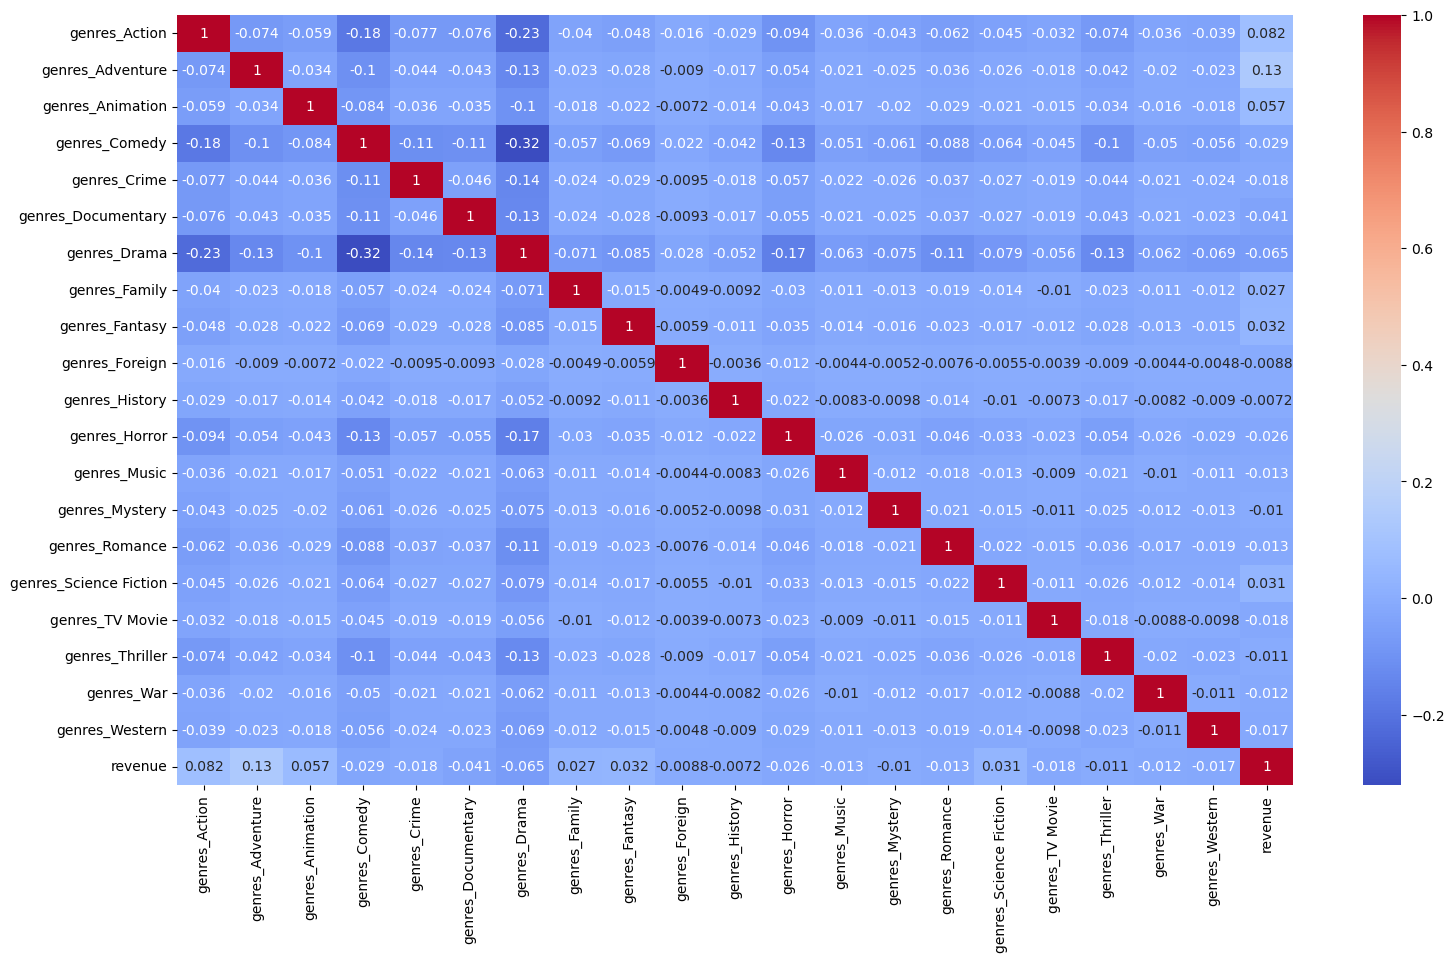

In [19]:
plt.figure(figsize=(18, 10))
sns.heatmap(yo.corr(), annot=True, cmap = "coolwarm")

In [21]:
data.original_language.value_counts()

en    23035
fr     1932
ja     1081
it      973
de      785
      ...  
ay        1
tg        1
jv        1
eo        1
ps        1
Name: original_language, Length: 85, dtype: int64

In [59]:
value_counts = data['original_language'].value_counts()
filtered_df = data[data['original_language'].isin(value_counts.index[value_counts > 200])]

In [60]:
filtered_df

,adult,genres,original_language,production_companies,production_countries,revenue
0,False,Romance,en,"Warner Bros., Lancaster Gate",United States of America,0
1,False,Action,en,Walt Disney Pictures,United States of America,0
2,False,Comedy,en,"Columbia Pictures, Castle Rock Entertainment, ...","France, United States of America",0
3,False,Drama,en,"Regency Enterprises, New Regency Pictures",United States of America,0
4,False,Drama,en,"Caravan Pictures, Hollywood Pictures",United States of America,0
...,...,...,...,...,...,...
45455,False,Action,en,"Paramount Pictures, Di Bonaventura Pictures, A...",United States of America,604942143
45456,False,Adventure,en,"DC Comics, Legendary Pictures, Warner Bros., B...",United States of America,391081192
45457,False,Action,en,"Marvel Studios, Prime Focus, Revolution Sun St...",United States of America,1405403694
45458,False,Adventure,en,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,961000000


In [69]:
okay = pd.concat([pd.get_dummies(filtered_df.original_language).add_prefix("original_language_"),data["revenue"]], axis=1)

In [70]:
okay

,original_language_cn,original_language_de,original_language_en,original_language_es,original_language_fr,original_language_hi,original_language_it,original_language_ja,original_language_ko,original_language_pt,original_language_ru,original_language_sv,original_language_zh,revenue
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000000
42874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26193068
43320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62000000
43866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170000000


<Axes: >

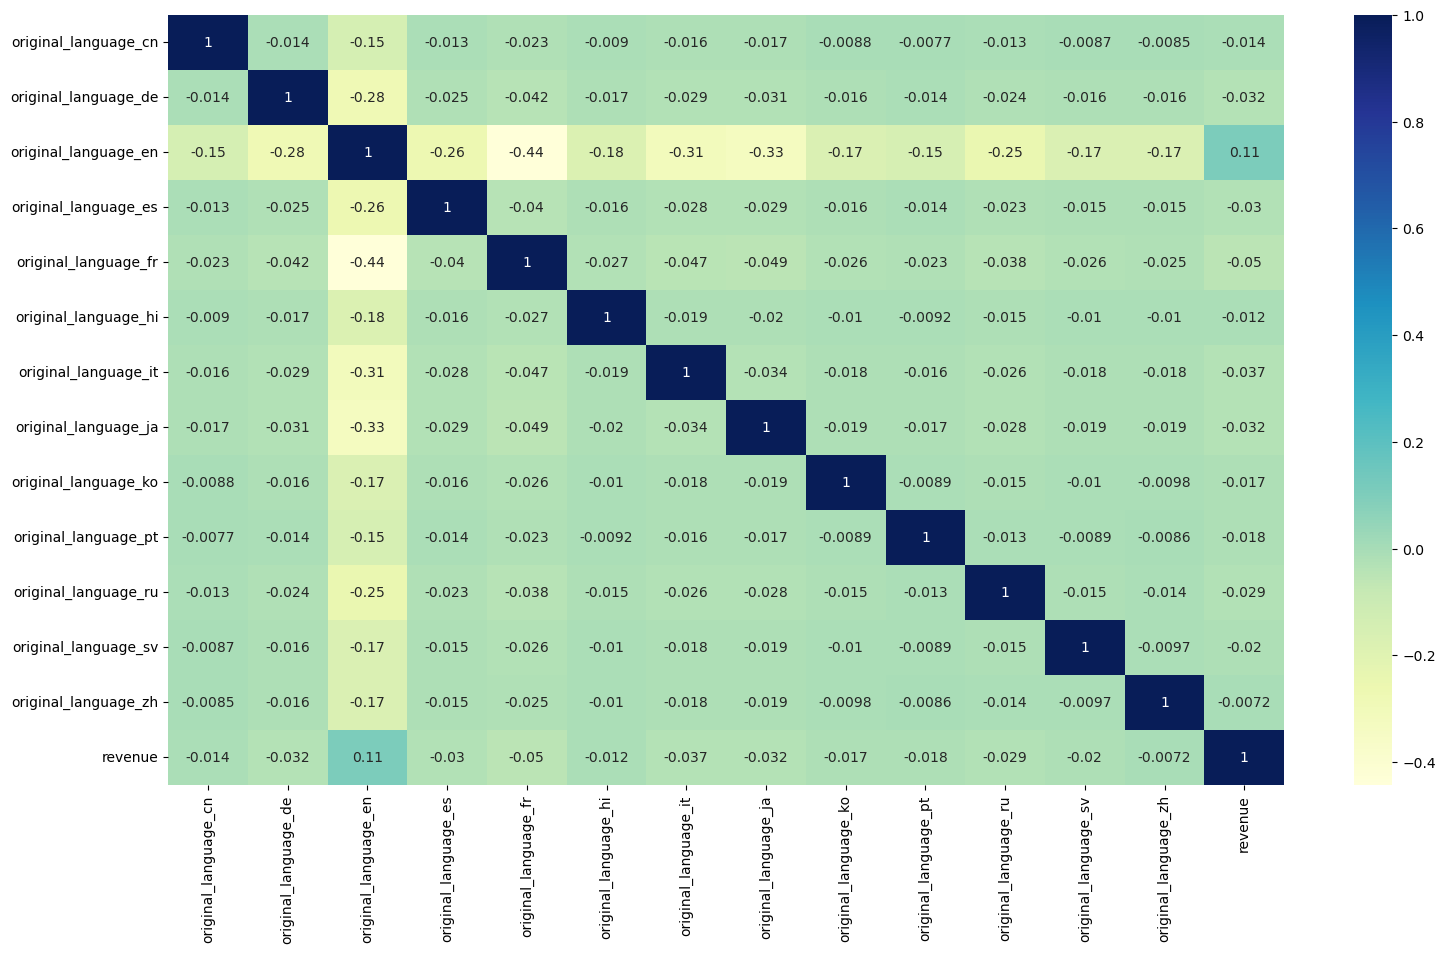

In [192]:
plt.figure(figsize=(18, 10))
sns.heatmap(okay.corr(), annot=True, cmap = "YlGnBu")

In [97]:
data

,adult,genres,original_language,production_companies,production_countries,revenue
0,False,Romance,en,Warner Bros.,United States of America,0
1,False,Action,en,Walt Disney Pictures,United States of America,0
2,False,Comedy,en,Columbia Pictures,France,0
3,False,Drama,en,Regency Enterprises,United States of America,0
4,False,Drama,en,Caravan Pictures,United States of America,0
...,...,...,...,...,...,...
45455,False,Action,en,Paramount Pictures,United States of America,604942143
45456,False,Adventure,en,DC Comics,United States of America,391081192
45457,False,Action,en,Marvel Studios,United States of America,1405403694
45458,False,Adventure,en,Walt Disney Pictures,United States of America,961000000


In [138]:
def extract_first_company(company_string):
    return company_string.split(',')[0]
data['production_companies'] = data['production_companies'].apply(extract_first_company)

def extract_first_country(country_string):
    return country_string.split(',')[0]
data['production_countries'] = data['production_countries'].apply(extract_first_country)


In [180]:

# Create a new DataFrame to store the filtered results
filtered_df = data.copy()  # Create a copy of the original DataFrame

# Filter the new DataFrame to include only revenue greater than 20,000
filtered_df = filtered_df[filtered_df['revenue'] > 20000]

value_counts_cp = filtered_df['production_countries'].value_counts()
filtered_df = filtered_df[filtered_df['production_countries'].isin(value_counts_cp.index[value_counts_cp > 80])]


In [181]:
#value_countscp = data['production_countries'].value_counts()
#filtered_df = df[df['revenue'] > 20000]

#filtered_df = data[data['production_countries'].isin(value_countscp.index[value_countscp > 400])]



In [182]:
filtered_df.production_countries.value_counts()

United States of America    4235
United Kingdom               514
France                       335
Canada                       243
Germany                      215
India                        164
Australia                    114
Japan                        108
Russia                        90
Spain                         81
Name: production_countries, dtype: int64

In [183]:
lop = pd.concat([pd.get_dummies(filtered_df.production_countries).add_prefix("prod_country_"), filtered_df["revenue"]], axis=1)

In [184]:
lop

,prod_country_Australia,prod_country_Canada,prod_country_France,prod_country_Germany,prod_country_India,prod_country_Japan,prod_country_Russia,prod_country_Spain,prod_country_United Kingdom,prod_country_United States of America,revenue
34750,0,0,1,0,0,0,0,0,0,0,20728
34751,0,0,0,0,0,0,0,0,1,0,21268
34754,0,0,0,0,0,0,0,0,0,1,21660
34755,0,0,0,0,0,0,0,0,0,1,21833
34756,0,1,0,0,0,0,0,0,0,0,21878
...,...,...,...,...,...,...,...,...,...,...,...
45455,0,0,0,0,0,0,0,0,0,1,604942143
45456,0,0,0,0,0,0,0,0,0,1,391081192
45457,0,0,0,0,0,0,0,0,0,1,1405403694
45458,0,0,0,0,0,0,0,0,0,1,961000000


<Axes: >

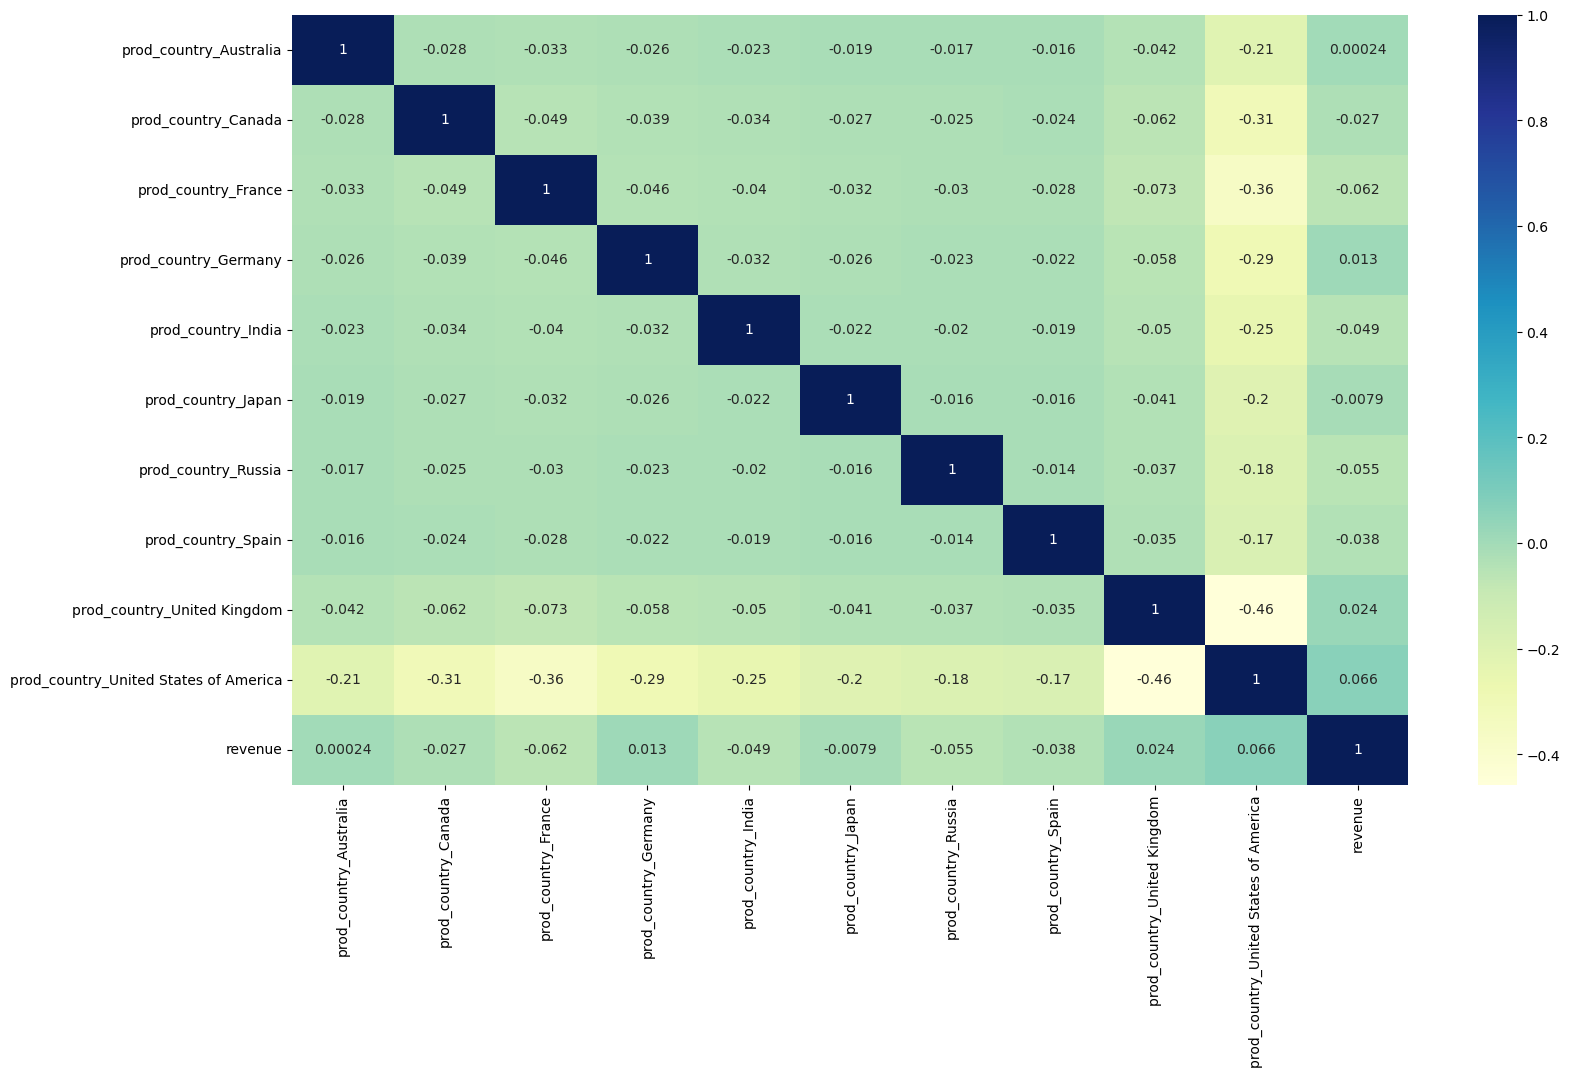

In [191]:
plt.figure(figsize=(18, 10))
sns.heatmap(lop.corr(), annot=True, cmap = "YlGnBu")

In [131]:
filtered_df.production_companies.value_counts()

Paramount Pictures                        990
Metro-Goldwyn-Mayer (MGM)                 838
Twentieth Century Fox Film Corporation    766
Warner Bros.                              750
Universal Pictures                        748
Columbia Pictures                         423
Columbia Pictures Corporation             398
RKO Radio Pictures                        301
Name: production_companies, dtype: int64

In [186]:
filtered_df = data.copy()  # Create a copy of the original DataFrame

# Filter the new DataFrame to include only revenue greater than 20,000
filtered_df = filtered_df[filtered_df['revenue'] > 20000]

value_counts_cp = filtered_df['production_companies'].value_counts()
filtered_df = filtered_df[filtered_df['production_companies'].isin(value_counts_cp.index[value_counts_cp > 80])]


In [187]:
pol = pd.concat([pd.get_dummies(filtered_df.production_companies).add_prefix("prod_company_"), filtered_df["revenue"]], axis=1)

<Axes: >

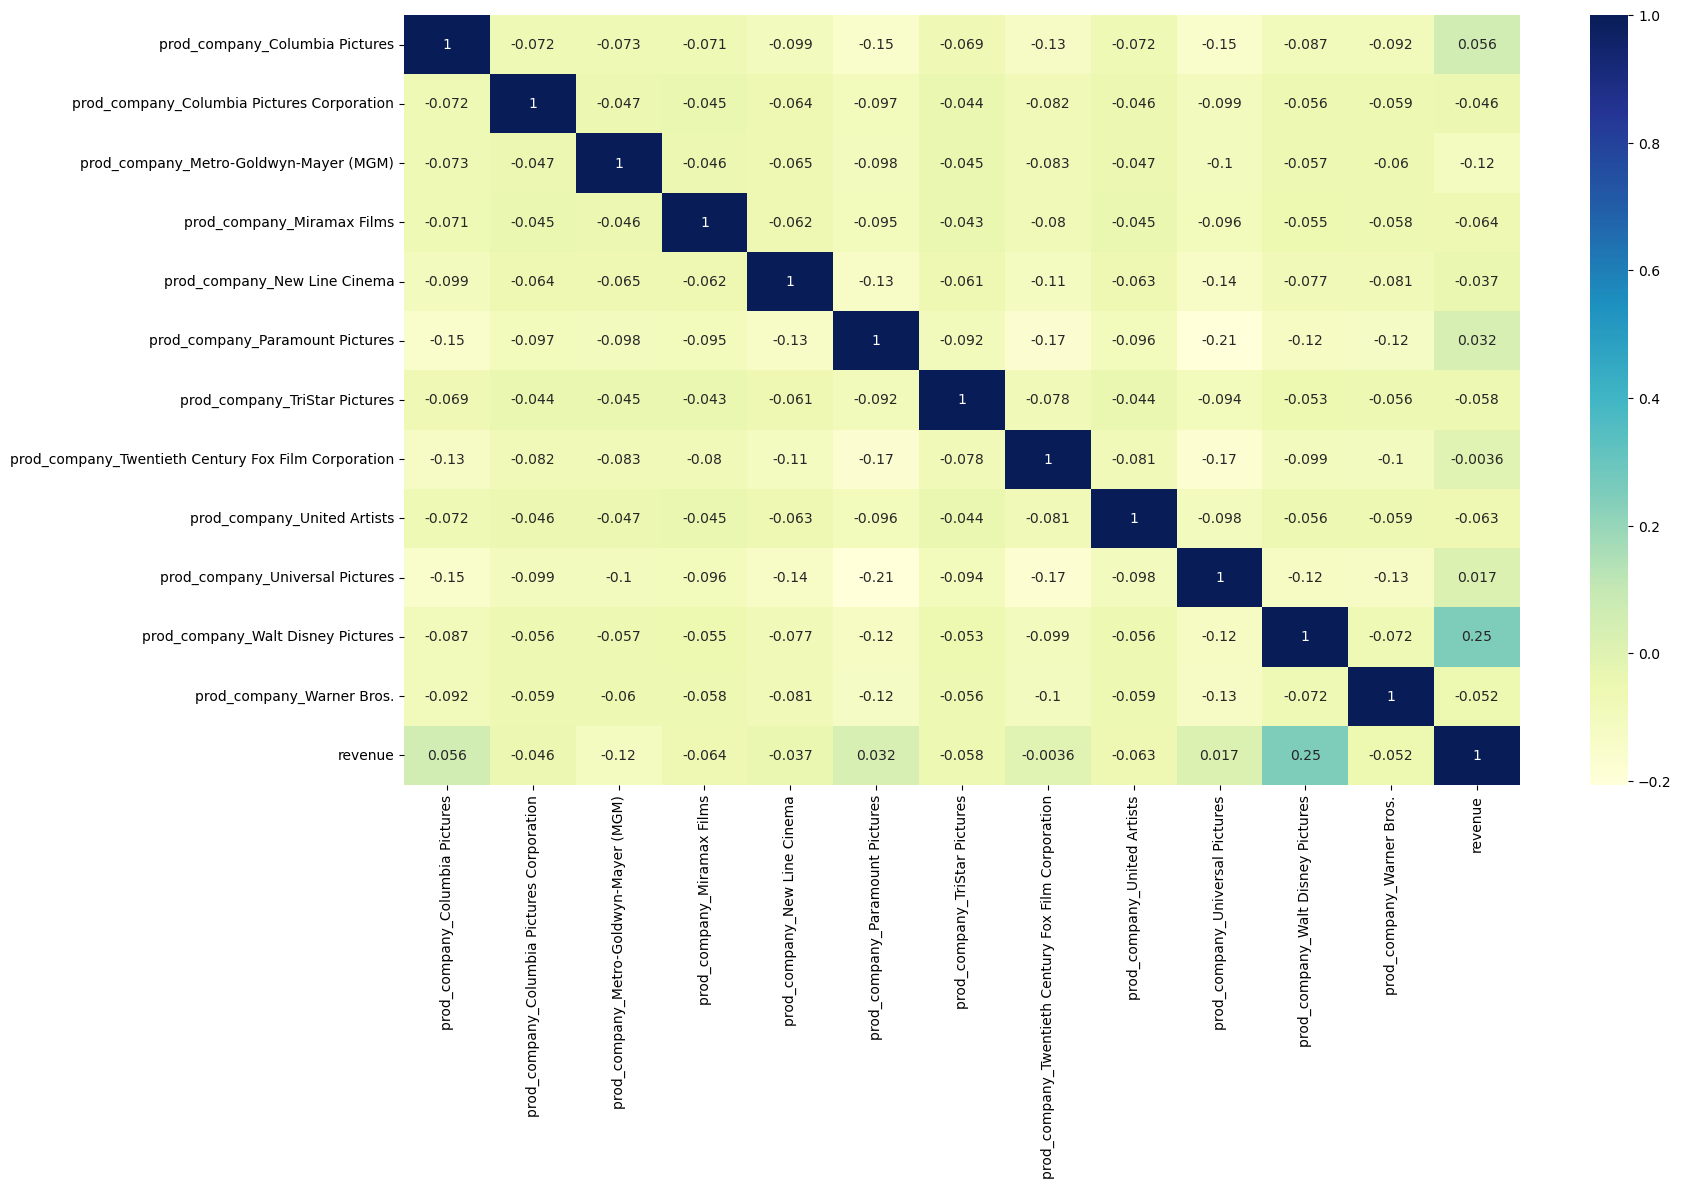

In [190]:
plt.figure(figsize=(18, 10))
sns.heatmap(pol.corr(), annot=True, cmap = "YlGnBu")